### Agent-Lab: Adaptive RAG Agent

Objective of this notebook is evaluating and adapting the implementation of [Adaptive RAG Agent](https://langchain-ai.github.io/langgraph/tutorials/rag/langgraph_adaptive_rag/).


In [1]:
%%capture
import json
import os

os.chdir("..")

from dotenv import load_dotenv

load_dotenv()

from IPython.display import Markdown, display

from notebooks import experiment_utils
from app.core.container import Container
from app.interface.api.messages.schema import MessageRequest

# graph rendering
import nest_asyncio

nest_asyncio.apply()

# start dependency injection container
container = Container()
container.init_resources()
container.wire(modules=[__name__])

# get checkpointer instance
graph_persistence_factory = container.graph_persistence_factory()
checkpointer = graph_persistence_factory.build_checkpoint_saver()

---

## XAI Adaptive RAG Agent

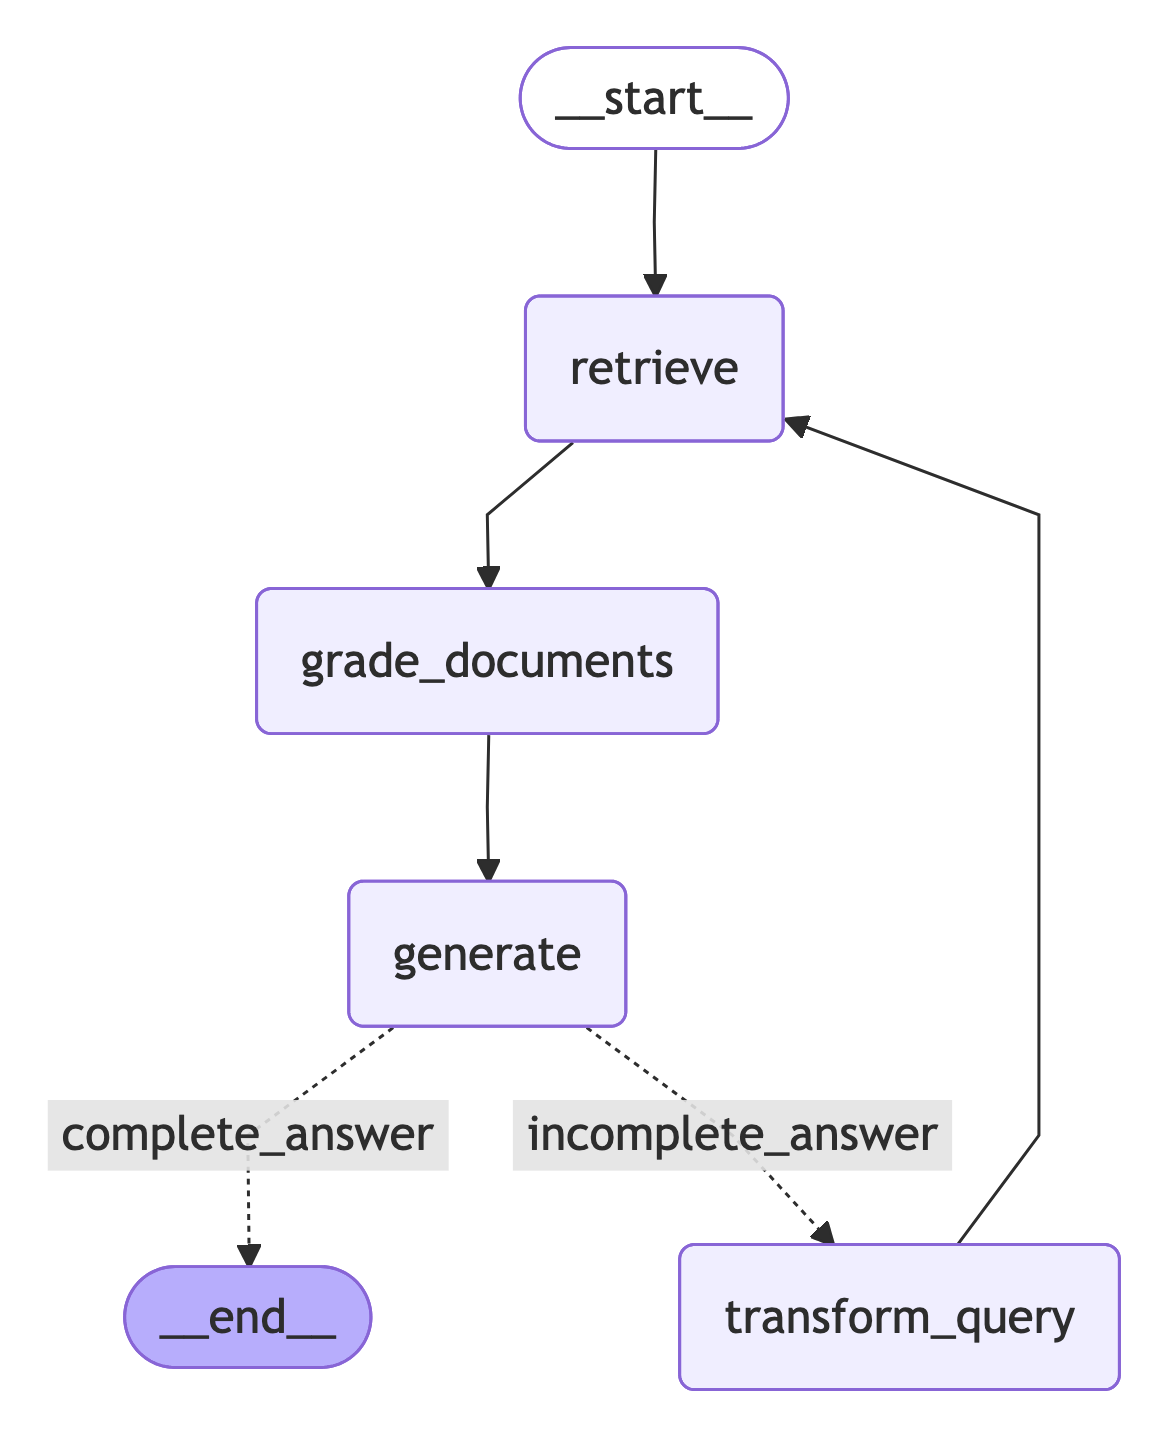

In [2]:
# Create Workflow
xai_agent = experiment_utils.create_xai_agent(
    agent_type="adaptive_rag", llm_tag="grok-code-fast", api_key=os.getenv("XAI_API_KEY")
)
xai_adaptive_rag_agent = container.adaptive_rag_agent()
xai_workflow_builder = xai_adaptive_rag_agent.get_workflow_builder(xai_agent["id"])
xai_workflow = xai_workflow_builder.compile(checkpointer=checkpointer)

experiment_utils.print_graph(xai_workflow)

In [3]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="What is the pinnacle of excellence?",
    agent_id=xai_agent["id"],
)

inputs = xai_adaptive_rag_agent.get_input_params(message, schema="public")
config = xai_adaptive_rag_agent.get_config(xai_agent["id"])
result = xai_workflow.invoke(inputs, config)
ai_message_content, workflow_state = xai_adaptive_rag_agent.format_response(result)

In [4]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

According to Sun Tzu, the pinnacle of excellence is breaking the enemy’s resistance without fighting, planning secretly, and winning without shedding a drop of blood.

In [5]:
display(
    Markdown(
        f"**Workflow state:**\n```json\n{json.dumps(workflow_state, indent=2)}\n```"
    )
)

**Workflow state:**
```json
{
  "agent_id": "49778685-5653-4fb4-837f-d070e566f408",
  "query": "What is the pinnacle of excellence?",
  "collection_name": "static_document_data_ollama_embeddings",
  "generation": "According to Sun Tzu, the pinnacle of excellence is breaking the enemy\u2019s resistance without fighting, planning secretly, and winning without shedding a drop of blood.",
  "connection": "The query asks for the pinnacle of excellence, and the provided context from Sun Tzu's Art of War defines supreme excellence in generalship as achieving victory without fighting, through strategic planning and foiling the enemy's plans.",
  "documents": [
    "Hence to fight and conquer in all your battles is not supreme excellence; supreme excellence consists in breaking the enemy\u2019s resistance without fighting.\n\n[Here again, no modern strategist but will approve the words of the old Chinese general. Moltke\u2019s greatest triumph, the capitulation of the huge French army at Sedan, was won practically without bloodshed.]\n\nThus the highest form of generalship is to baulk the enemy\u2019s plans;",
    "Neither is it the acme of excellence if you fight and conquer and the whole Empire says, \"Well done!\"\n\n[True excellence being, as Tu Mu says: \"To plan secretly, to move surreptitiously, to foil the enemy\u2019s intentions and balk his schemes, so that at last the day may be won without shedding a drop of blood.\" Sun Tz\u016d reserves his approbation for things that\n\n\"the world\u2019s coarse thumb And finger fail to plumb.\"\n\nTo lift an autumn hair is no sign of great strength;",
    "Thus on the one hand we have ability to protect ourselves; on the other, a victory that is complete.\n\nTo see victory only when it is within the ken of the common herd is not the acme of excellence."
  ]
}
```

In [6]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="Can you repeat my previous question and answer it again but this time in dutch?",
    agent_id=xai_agent["id"],
)

inputs = xai_adaptive_rag_agent.get_input_params(message, schema="public")
config = xai_adaptive_rag_agent.get_config(xai_agent["id"])
result = xai_workflow.invoke(inputs, config)
ai_message_content, workflow_state = xai_adaptive_rag_agent.format_response(result)

In [7]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

Uw vorige vraag was: "Wat is het toppunt van excellentie?" Het antwoord is: Volgens Sun Tzu is het toppunt van excellentie het breken van de weerstand van de vijand zonder te vechten, geheim plannen maken en winnen zonder een druppel bloed te vergieten.

In [8]:
display(
    Markdown(
        f"**Workflow state:**\n```json\n{json.dumps(workflow_state, indent=2)}\n```"
    )
)

**Workflow state:**
```json
{
  "agent_id": "49778685-5653-4fb4-837f-d070e566f408",
  "query": "Can you repeat my previous question and answer it again but this time in dutch?",
  "collection_name": "static_document_data_ollama_embeddings",
  "generation": "Uw vorige vraag was: \"Wat is het toppunt van excellentie?\" Het antwoord is: Volgens Sun Tzu is het toppunt van excellentie het breken van de weerstand van de vijand zonder te vechten, geheim plannen maken en winnen zonder een druppel bloed te vergieten.",
  "connection": "The user is asking to repeat their previous question and provide the answer again, but in Dutch, based on the previous interaction about the pinnacle of excellence from Sun Tzu's teachings.",
  "documents": []
}
```

In [9]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="Kun je mijn vorige vraag en jouw antwoord herhalen maar dit keer in het Portugees?",
    agent_id=xai_agent["id"],
)

inputs = xai_adaptive_rag_agent.get_input_params(message, schema="public")
config = xai_adaptive_rag_agent.get_config(xai_agent["id"])
result = xai_workflow.invoke(inputs, config)
ai_message_content, workflow_state = xai_adaptive_rag_agent.format_response(result)

In [10]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

Sua pergunta anterior foi: "O que é o auge da excelência?" A resposta é: Segundo Sun Tzu, o auge da excelência é quebrar a resistência do inimigo sem lutar, planejar secretamente e vencer sem derramar uma gota de sangue.

In [11]:
display(
    Markdown(
        f"**Workflow state:**\n```json\n{json.dumps(workflow_state, indent=2)}\n```"
    )
)

**Workflow state:**
```json
{
  "agent_id": "49778685-5653-4fb4-837f-d070e566f408",
  "query": "Kun je mijn vorige vraag en jouw antwoord herhalen maar dit keer in het Portugees?",
  "collection_name": "static_document_data_ollama_embeddings",
  "generation": "Sua pergunta anterior foi: \"O que \u00e9 o auge da excel\u00eancia?\" A resposta \u00e9: Segundo Sun Tzu, o auge da excel\u00eancia \u00e9 quebrar a resist\u00eancia do inimigo sem lutar, planejar secretamente e vencer sem derramar uma gota de sangue.",
  "connection": "The user is requesting a repetition of their previous question and the AI's answer, translated into Portuguese, based on the ongoing conversation about the pinnacle of excellence from Sun Tzu's teachings.",
  "documents": []
}
```

---
## OpenAI Adaptive RAG Agent

In [12]:
# Create Workflow
openai_agent = experiment_utils.create_openai_agent(
    agent_type="adaptive_rag",
    llm_tag="gpt-5-nano",
)
openai_adaptive_rag_agent = container.adaptive_rag_agent()
openai_workflow_builder = openai_adaptive_rag_agent.get_workflow_builder(openai_agent["id"])
openai_workflow = openai_workflow_builder.compile(checkpointer=checkpointer)

In [13]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="What is the pinnacle of excellence?",
    agent_id=openai_agent["id"],
)

inputs = openai_adaptive_rag_agent.get_input_params(message, schema="public")
config = openai_adaptive_rag_agent.get_config(openai_agent["id"])
result = openai_workflow.invoke(inputs, config)
ai_message_content, workflow_state = openai_adaptive_rag_agent.format_response(result)

In [14]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

Supreme excellence is breaking the enemy’s resistance without fighting; the highest form of generalship is to baulk the enemy’s plans (win without bloodshed).

In [15]:
display(
    Markdown(
        f"**Workflow state:**\n```json\n{json.dumps(workflow_state, indent=2)}\n```"
    )
)

**Workflow state:**
```json
{
  "agent_id": "c16e6150-f374-4b81-8ad7-94f66b272b74",
  "query": "What is the pinnacle of excellence?",
  "collection_name": "static_document_data_openai_embeddings",
  "generation": "Supreme excellence is breaking the enemy\u2019s resistance without fighting; the highest form of generalship is to baulk the enemy\u2019s plans (win without bloodshed).",
  "connection": "The passage states that true pinnacle of excellence is achieving victory without fighting, by breaking the enemy\u2019s resistance and foiling their plans.",
  "documents": [
    "Neither is it the acme of excellence if you fight and conquer and the whole Empire says, \"Well done!\"\n\n[True excellence being, as Tu Mu says: \"To plan secretly, to move surreptitiously, to foil the enemy\u2019s intentions and balk his schemes, so that at last the day may be won without shedding a drop of blood.\" Sun Tz\u016d reserves his approbation for things that\n\n\"the world\u2019s coarse thumb And finger fail to plumb.\"\n\nTo lift an autumn hair is no sign of great strength;",
    "Thus on the one hand we have ability to protect ourselves; on the other, a victory that is complete.\n\nTo see victory only when it is within the ken of the common herd is not the acme of excellence.",
    "Hence to fight and conquer in all your battles is not supreme excellence; supreme excellence consists in breaking the enemy\u2019s resistance without fighting.\n\n[Here again, no modern strategist but will approve the words of the old Chinese general. Moltke\u2019s greatest triumph, the capitulation of the huge French army at Sedan, was won practically without bloodshed.]\n\nThus the highest form of generalship is to baulk the enemy\u2019s plans;"
  ]
}
```

In [16]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="Can you repeat my previous question and answer it again but this time in dutch?",
    agent_id=openai_agent["id"],
)

inputs = openai_adaptive_rag_agent.get_input_params(message, schema="public")
config = openai_adaptive_rag_agent.get_config(openai_agent["id"])
result = openai_workflow.invoke(inputs, config)
ai_message_content, workflow_state = openai_adaptive_rag_agent.format_response(result)

In [17]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

Vraag: Wat is het toppunt van uitmuntendheid?
Antwoord: Het toppunt van uitmuntendheid is het doorbreken van de weerstand van de vijand zonder te vechten; de hoogste vorm van legerkunst is het dwarsbomen van de plannen van de vijand (winnen zonder bloedvergieten).

In [18]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="Kun je mijn vorige vraag en jouw antwoord herhalen maar dit keer in het Portugees?",
    agent_id=openai_agent["id"],
)

inputs = openai_adaptive_rag_agent.get_input_params(message, schema="public")
config = openai_adaptive_rag_agent.get_config(openai_agent["id"])
result = openai_workflow.invoke(inputs, config)
ai_message_content, workflow_state = openai_adaptive_rag_agent.format_response(result)

In [19]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

Pergunta: Qual é o pináculo da excelência?
Resposta: A excelência suprema é romper a resistência do inimigo sem lutar; a forma mais elevada de comando militar é frustrar os planos do inimigo (vencer sem derramamento de sangue).

---
### Anthropic Adaptive RAG Agent

In [20]:
# Create Workflow
anthropic_agent = experiment_utils.create_anthropic_agent(
    agent_type="adaptive_rag", llm_tag="claude-sonnet-4-20250514", api_key=os.getenv("ANTHROPIC_API_KEY")
)
anthropic_adaptive_rag_agent = container.adaptive_rag_agent()
anthropic_workflow_builder = anthropic_adaptive_rag_agent.get_workflow_builder(anthropic_agent["id"])
anthropic_workflow = anthropic_workflow_builder.compile(checkpointer=checkpointer)

In [21]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="What is the pinnacle of excellence?",
    agent_id=anthropic_agent["id"],
)

inputs = anthropic_adaptive_rag_agent.get_input_params(message, schema="public")
config = anthropic_adaptive_rag_agent.get_config(anthropic_agent["id"])
result = anthropic_workflow.invoke(inputs, config)
ai_message_content, workflow_state = anthropic_adaptive_rag_agent.format_response(result)

In [22]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

According to the context from Sun Tzu's strategic teachings, the pinnacle of excellence is achieving victory without fighting - specifically "breaking the enemy's resistance without fighting." True excellence involves planning secretly, moving strategically, and defeating opponents through superior tactics rather than brute force. The highest form of skill is accomplishing goals that appear effortless to observers, where victory is achieved "without shedding a drop of blood." This represents mastery that goes beyond what the "common herd" can recognize or appreciate.

In [23]:
display(
    Markdown(
        f"**Workflow state:**\n```json\n{json.dumps(workflow_state, indent=2)}\n```"
    )
)

**Workflow state:**
```json
{
  "agent_id": "52f9c730-99a9-4bb1-a3e7-1195b89260a7",
  "query": "What is the pinnacle of excellence?",
  "collection_name": "static_document_data_ollama_embeddings",
  "generation": "According to the context from Sun Tzu's strategic teachings, the pinnacle of excellence is achieving victory without fighting - specifically \"breaking the enemy's resistance without fighting.\" True excellence involves planning secretly, moving strategically, and defeating opponents through superior tactics rather than brute force. The highest form of skill is accomplishing goals that appear effortless to observers, where victory is achieved \"without shedding a drop of blood.\" This represents mastery that goes beyond what the \"common herd\" can recognize or appreciate.",
  "connection": "The context directly addresses the concept of pinnacle/supreme excellence through Sun Tzu's strategic philosophy, defining what constitutes the highest form of achievement.",
  "documents": [
    "Hence to fight and conquer in all your battles is not supreme excellence; supreme excellence consists in breaking the enemy\u2019s resistance without fighting.\n\n[Here again, no modern strategist but will approve the words of the old Chinese general. Moltke\u2019s greatest triumph, the capitulation of the huge French army at Sedan, was won practically without bloodshed.]\n\nThus the highest form of generalship is to baulk the enemy\u2019s plans;",
    "Neither is it the acme of excellence if you fight and conquer and the whole Empire says, \"Well done!\"\n\n[True excellence being, as Tu Mu says: \"To plan secretly, to move surreptitiously, to foil the enemy\u2019s intentions and balk his schemes, so that at last the day may be won without shedding a drop of blood.\" Sun Tz\u016d reserves his approbation for things that\n\n\"the world\u2019s coarse thumb And finger fail to plumb.\"\n\nTo lift an autumn hair is no sign of great strength;",
    "Thus on the one hand we have ability to protect ourselves; on the other, a victory that is complete.\n\nTo see victory only when it is within the ken of the common herd is not the acme of excellence."
  ]
}
```

In [24]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="Can you repeat my previous question and answer it again but this time in dutch?",
    agent_id=anthropic_agent["id"],
)

inputs = anthropic_adaptive_rag_agent.get_input_params(message, schema="public")
config = anthropic_adaptive_rag_agent.get_config(anthropic_agent["id"])
result = anthropic_workflow.invoke(inputs, config)
ai_message_content, workflow_state = anthropic_adaptive_rag_agent.format_response(result)

In [25]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

Based on the conversation history, your previous question was: "What is the pinnacle of excellence?"

And I already provided the Dutch translation in my previous response:

**Uw vorige vraag was:** "Wat is het toppunt van excellentie?"

**Antwoord in het Nederlands:** Volgens de context van Sun Tzu's strategische leer is het toppunt van excellentie het behalen van overwinning zonder te vechten - specifiek "het breken van de weerstand van de vijand zonder te vechten." Ware excellentie houdt in dat men geheim plant, strategisch beweegt, en tegenstanders verslaat door superieure tactieken in plaats van brute kracht. De hoogste vorm van vaardigheid is het bereiken van doelen die moeiteloos lijken voor waarnemers, waarbij overwinning wordt behaald "zonder een druppel bloed te vergieten." Dit vertegenwoordigt meesterschap dat voorbij gaat aan wat de "gewone massa" kan herkennen of waarderen.

In [26]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="Kun je mijn vorige vraag en jouw antwoord herhalen maar dit keer in het Portugees?",
    agent_id=anthropic_agent["id"],
)

inputs = anthropic_adaptive_rag_agent.get_input_params(message, schema="public")
config = anthropic_adaptive_rag_agent.get_config(anthropic_agent["id"])
result = anthropic_workflow.invoke(inputs, config)
ai_message_content, workflow_state = anthropic_adaptive_rag_agent.format_response(result)

In [27]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

Sua pergunta anterior foi: "Qual é o ápice da excelência?"

Resposta em português: Segundo o contexto dos ensinamentos estratégicos de Sun Tzu, o ápice da excelência é alcançar a vitória sem lutar - especificamente "quebrar a resistência do inimigo sem lutar." A verdadeira excelência envolve planejar em segredo, mover-se estrategicamente, e derrotar oponentes através de táticas superiores em vez de força bruta. A forma mais elevada de habilidade é alcançar objetivos que parecem sem esforço para os observadores, onde a vitória é alcançada "sem derramar uma gota de sangue." Isso representa maestria que vai além do que o "rebanho comum" pode reconhecer ou apreciar.